## Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learing model capable of predicting whether or not someone has heart disease based on their medical conditions

### 1. Problem Definition

In a statement
>given clinical parameters aboubt a patient can we predict whether they have heart disease or not?

### 2.Data

The original data came from the cleavland data from the UCI Machine learning repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease

there is also a version of it is available on kaggle.
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

### 3. Evalution

> If we can reach 95%  accuracy at predicting whether or not a patient has heart disease during the proof of concept , we'll pursue the project.

### 4. Features

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
6. serum = LDL + HDL + .2 * triglycerides
   above 200 is cause for concern
7. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   '>126' mg/dL signals diabetes
8. restecg - resting electrocardiographic results
   * 0: Nothing to note
   * 1: ST-T Wave abnormality
     can range from mild symptoms to severe problems
     signals non-normal heart beat
   * 2: Possible or definite left ventricular hypertrophy
     Enlarged heart's main pumping chamber
9. thalach - maximum heart rate achieved
10. exang - exercise induced angina (1 = yes; 0 = no)
11. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
      slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
      the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)





### Preparing the tools
 we are going to use pandas , Matplotlib and numpy for data analysis and manipulation

In [1]:
#Regular explaratory data analysis (EDA) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we want our plots to appear inside the notebook
%matplotlib inline 


#Models from Sckit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

#### Data Exploration (Exploratory data analysis or EDA)

Our goal here is to find out more about the data 

1. what question(s) we are trying to solve?
2. what kind of data do we have and how we treat different types?
3. what's missing from the data and how do we deal with it?
4. where are the outliers and why should we care about them?
5. How can we add , change or remove features to get more from our data


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

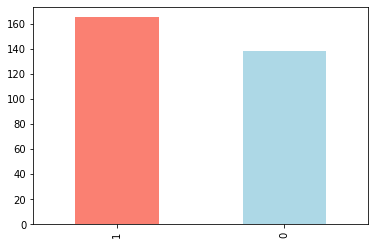

In [6]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Heart Disease Frequency according to sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
#compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


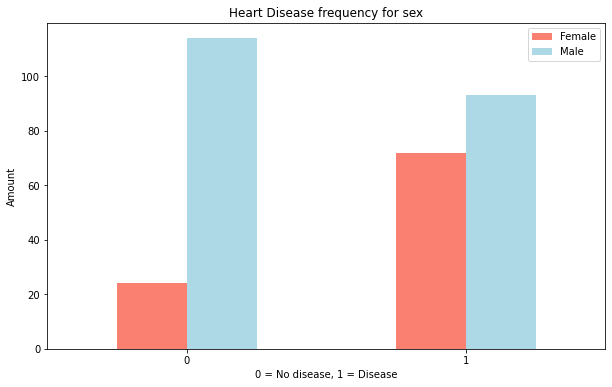

In [12]:
#create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=[ "salmon","lightblue"])
plt.title("Heart Disease frequency for sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

### Age V/S max. heart rate for Heart-Disease 

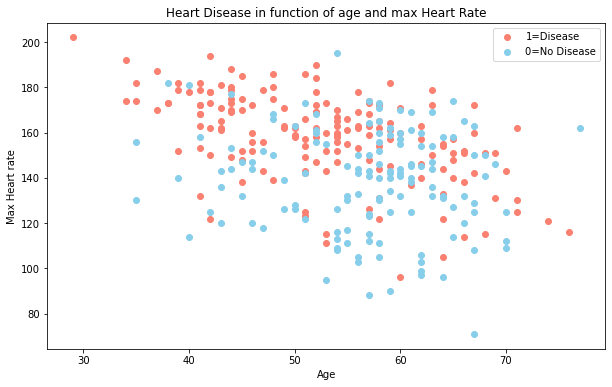

In [13]:
plt.figure(figsize=(10,6))

#scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon");

#scatter with negative example
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="skyblue");

plt.title("Heart Disease in function of age and max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart rate")
plt.legend(["1=Disease","0=No Disease"]);

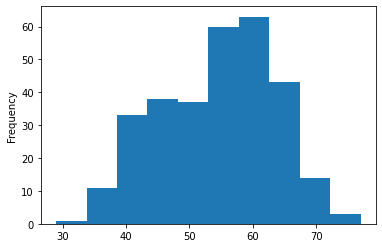

In [14]:
# Check the distribution of age column with histogram
df.age.plot.hist();

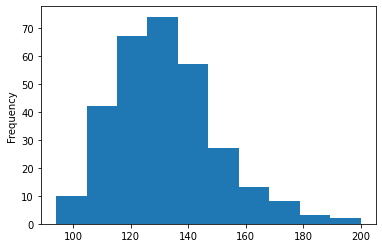

In [15]:
df.trestbps.plot.hist();

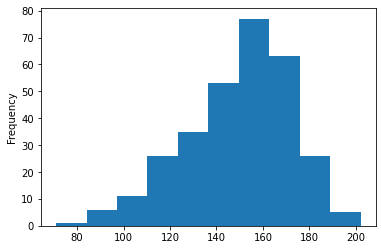

In [16]:
df.thalach.plot.hist();

#### Heart Disease frequency per chest pain type
* cp - chest pain type
  * 0: Typical angina: chest pain related decrease blood supply to the heart
  * 1: Atypical angina: chest pain not related to heart
  * 2: Non-anginal pain: typically esophageal spasms (non heart related)
  * 3: Asymptomatic: chest pain not showing signs of disease

In [17]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


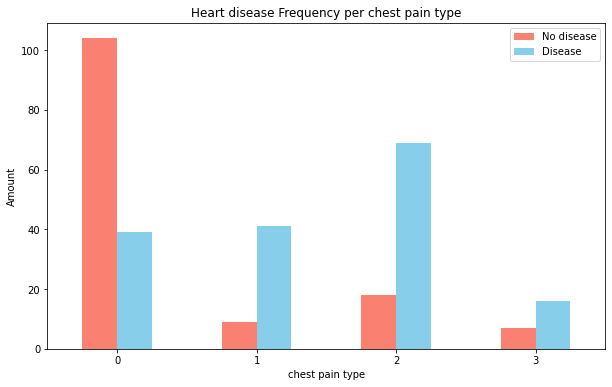

In [18]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","skyblue"]
                                 )
plt.title("Heart disease Frequency per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("Amount")
plt.legend(["No disease","Disease"])
plt.xticks(rotation=0);

In [19]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


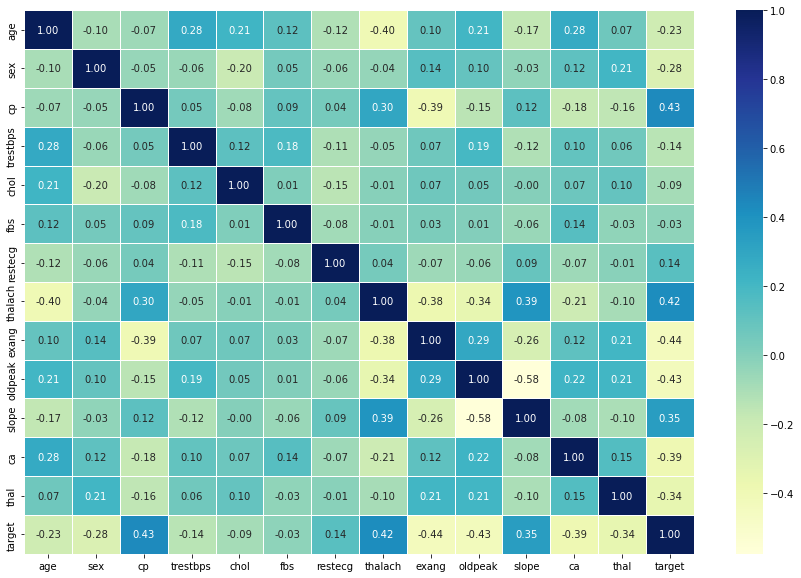

In [20]:
# make correlation matrix visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot= True,
                 linewidths=0.5,
                 fmt="0.2f",
                 cmap="YlGnBu");

### Modeling

In [21]:
# split the data into x  and y
x=df.drop("target", axis=1)
y=df["target"]


In [22]:
#split the data into training and test set
np.random.seed(32)
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

In [23]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2


In [24]:
y_train

134    1
273    0
268    0
201    0
213    0
      ..
71     1
252    0
88     1
43     1
215    0
Name: target, Length: 242, dtype: int64

 Now we have got our data into training and test sets, its time to build machine learning model.

 we will train it (find the patterns) on the training set.

 And we will test it (use the patterns) on the test set.
 we are going to try three different machine learning model
  1. Logistic regression
  2. K-Nearest Neighbours classifier
  3. Random forest classifier

In [25]:
# Put Models in a dictionary
models = {"Logistic regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models
    models : a dict of different SciKit-Learn machine learning models
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    #set random seed
    np.random.seed(32)
    # Make a Dictionary to keep model scores
    model_scores = {}
    #loop through models
    for name, model in models.items():
        #fit the model to the data
        model.fit(x_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [26]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\hp\Desktop\heart-disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic regression': 0.8360655737704918,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8524590163934426}

#### Model comparison

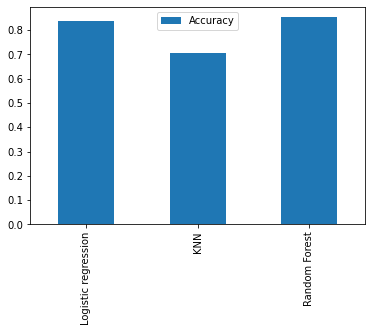

In [27]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar();

Now we have got a baseline model and we know that a model's first predictictions aren't always what we should based our next steps off.

Let's look at the folloowing
* Hyperparameter tuning
* Feature Importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning

In [28]:
# Let's tune KNN
train_scores = []
test_scores = []

#create  list of different values of n neighbours
neighbors = range(1,21)

# Set up KNN instance
knn = KNeighborsClassifier()

# Loop through different neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(x_train,y_train)
    
    # Update training score list
    train_scores.append(knn.score(x_train,y_train))

    #Update the scores list
    test_scores.append(knn.score(x_test,y_test))


In [29]:
train_scores

[1.0,
 0.7892561983471075,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.7479338842975206,
 0.7396694214876033,
 0.6983471074380165,
 0.71900826446281,
 0.7107438016528925,
 0.6942148760330579,
 0.7024793388429752,
 0.6735537190082644,
 0.6859504132231405,
 0.6776859504132231,
 0.6776859504132231,
 0.6859504132231405,
 0.6818181818181818,
 0.6818181818181818,
 0.6942148760330579]

In [30]:
test_scores

[0.7213114754098361,
 0.6229508196721312,
 0.7213114754098361,
 0.6721311475409836,
 0.7049180327868853,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.639344262295082,
 0.639344262295082,
 0.6721311475409836,
 0.6557377049180327,
 0.639344262295082,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853]

maximum KNN score on the test data: 72.13%


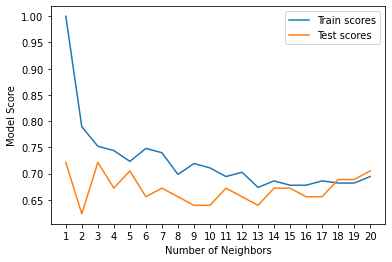

In [31]:
plt.plot(neighbors,train_scores,label="Train scores")
plt.plot(neighbors,test_scores,label="Test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend();

print(f"maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV

we're going to tune:
* LogisticRegression()
* RandomForestClassifier()

 .... Using RandomizedSearchCV

In [32]:
# Create a Hyperparameter grid for logistic regression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver":[("liblinear")]}

In [33]:
# Create a Hyperpaarmeter grid for RandomForestClassifier
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
from pprint import pprint

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


Now we have got hyperparameters grids setups for each of our models, let us tune them using RandomizedsearchCV....

In [34]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random Hyperparameter search for LOgisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [36]:
rs_log_reg.score(x_test,y_test)

0.819672131147541

In [37]:
#Tuning random forest classifier
rs_rf_clf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions = random_grid,
                               n_iter = 20,
                               cv = 5,
                               verbose=True)

rs_rf_clf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=True)

In [38]:
rf = RandomForestClassifier(random_state = 42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [39]:
rs_rf_clf.score(x_test,y_test)

0.8360655737704918

In [40]:
rs_rf_clf.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [41]:
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [42]:
gs_log_reg.score(x_test,y_test)

0.819672131147541

## Model Evalution

In [44]:
y_preds = rs_rf_clf.predict(x_test)
y_preds

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [45]:
y_test

91     1
297    0
19     1
153    1
60     1
      ..
204    0
66     1
274    0
11     1
45     1
Name: target, Length: 61, dtype: int64

C:\Users\hp\Desktop\heart-disease\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


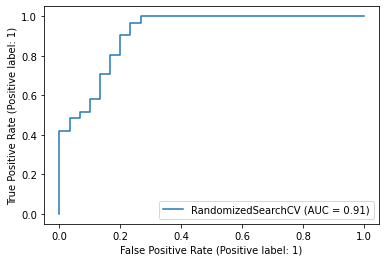

In [46]:
#plotting ROC curve and calculate AUC matrix
plot_roc_curve(rs_rf_clf,x_test,y_test);

In [47]:
print(confusion_matrix(y_test,y_preds))

[[23  7]
 [ 3 28]]


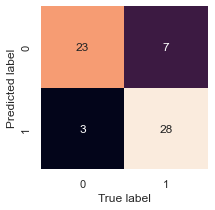

In [48]:
sns.set(font_scale=1)
def plot_conf_mat(y_test,y_preds):
    """
    plots a confusion matrix using Seaborn's Heatmap
    """
    fig, ax =plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
      
plot_conf_mat(y_test,y_preds)

In [49]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.80      0.90      0.85        31

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



### Evaluation metrices using cross validation score

In [75]:
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [76]:
#cross validated accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.80327869, 0.8       , 0.8       ])

In [77]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8249180327868851

In [78]:
#cross validated precision
cv_precision = cross_val_score(clf,
                               x,
                               y,
                               cv=5,
                               scoring="precision")
cv_precision= np.mean(cv_precision)
cv_precision

0.8354645531322102

In [79]:
#cross validated recall
cv_recall = cross_val_score(clf,
                            x,
                            y,
                            cv=5,
                            scoring="recall")
cv_recall

array([0.87878788, 0.84848485, 0.78787879, 0.81818182, 0.87878788])

In [80]:
cv_recall = np.mean(cv_recall)
cv_recall

0.8424242424242424

In [81]:
#cross validated f1 score
cv_f1 = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1

array([0.86956522, 0.89552239, 0.79365079, 0.84057971, 0.81690141])

In [82]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8432439035394863

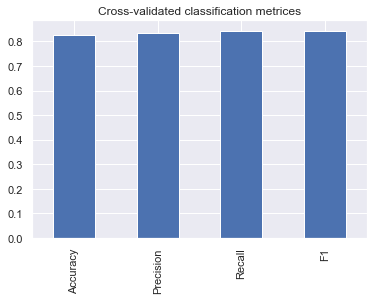

In [83]:
#visualise cross validated metrices
cv_metrices = pd.DataFrame({"Accuracy":cv_acc,
               "Precision":cv_precision,
               "Recall":cv_recall,
               "F1":cv_f1},
               index=[0])
cv_metrices.T.plot.bar(title="Cross-validated classification metrices",
                       legend=False);

### Feature Importance

In [85]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
clf.feature_importances_

array([0.0814529 , 0.03458146, 0.11784759, 0.08109235, 0.08670177,
       0.00980936, 0.020225  , 0.11625888, 0.09079179, 0.10071936,
       0.03973585, 0.10615224, 0.11463145])

In [87]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [89]:
#match coffecients of features to columns
feature_dict = {"age":0.0814529,
                "sex":0.03458146,
                "cp":0.11784759,
                "trestbps":0.08109235,
                "chol":0.08670177,
                "fbs":0.00980936,
                "restecg": 0.020225 ,
                "thalach":0.11625888,
                "exang":0.09079179,
                "oldpeak":0.10071936,
                "slope":0.03973585,
                "ca":0.10615224,
                "thal":0.11463145}
feature_dict

{'age': 0.0814529,
 'sex': 0.03458146,
 'cp': 0.11784759,
 'trestbps': 0.08109235,
 'chol': 0.08670177,
 'fbs': 0.00980936,
 'restecg': 0.020225,
 'thalach': 0.11625888,
 'exang': 0.09079179,
 'oldpeak': 0.10071936,
 'slope': 0.03973585,
 'ca': 0.10615224,
 'thal': 0.11463145}

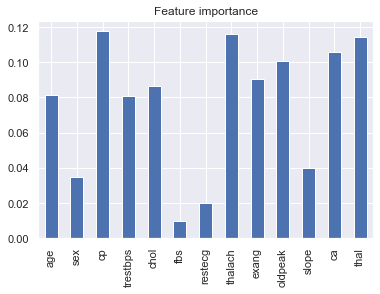

In [90]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature importance",legend=False);

In [ ]:
After lot of experimentation I could not hit the required evalution metric , the possible reasons may be is less number of data available.
